# Algorithm+Trading+HW02
#### 9조 : 나승찬, 송민경, 신재호

-----

## Python and Due Dates 

* Each project group consists of three students (at least two students)
* You may refer to any paper or any website, which you should mention in front of your report as well as your python program
* The only packages allowed for the programming assignments are NumPy, Matplotlib, Pandas, Gurobi, SciPy, Seaborn, and standard Python libraries : https://docs.python.org/3/library/
* Do NOT use other Machine Learning packages like Scikit-learn
* You should make a report including the data download method, programs, and interpretation

## Plot Time Series Datasets

* Download the following datasets
    * KOSPI data for the last 3 years
    * KOSDAQ data for the last 3 years
    * Choose one company from KOSPI Market, and download the last 3 year stock data
    * Choose one company from KOSDAQ Market, and download the last 3 year stock data

* Plot the monthly time series and daily time series (for the recent one year) of each of the four datasets

------

## Import Packages

In [20]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

### KOSPI data for the last 3 years

Downloaded stock data from yahoo finance :

https://finance.yahoo.com/quote/%5EKS11/history

#### Daily time series

In [10]:
df_kospi = pd.read_csv('Data/^KS11.csv')
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       737 non-null    object 
 1   Open       737 non-null    float64
 2   High       737 non-null    float64
 3   Low        737 non-null    float64
 4   Close      737 non-null    float64
 5   Adj Close  737 non-null    float64
 6   Volume     737 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.4+ KB


In [24]:
df_kospi['Date'] = pd.to_datetime(df_kospi['Date'])
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       737 non-null    datetime64[ns]
 1   Open       737 non-null    float64       
 2   High       737 non-null    float64       
 3   Low        737 non-null    float64       
 4   Close      737 non-null    float64       
 5   Adj Close  737 non-null    float64       
 6   Volume     737 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.4 KB


In [35]:
#recent 1 years
df_kospi = df_kospi[df_kospi['Date'] >= '2023-05-16']
df_kospi.reset_index(drop = True, inplace = True)
df_kospi

,Date,Open,High,Low,Close,Adj Close,Volume,20dMovingAverage
0,2023-05-16,2494.399902,2498.540039,2474.899902,2480.239990,2480.239990,627900,2514.840002
1,2023-05-17,2479.649902,2498.370117,2475.020020,2494.659912,2494.659912,563300,2510.777502
2,2023-05-18,2511.090088,2515.399902,2500.010010,2515.399902,2515.399902,571500,2507.992993
3,2023-05-19,2530.830078,2538.310059,2524.889893,2537.790039,2537.790039,569300,2506.128491
4,2023-05-22,2540.030029,2564.090088,2533.500000,2557.080078,2557.080078,590500,2505.826990
...,...,...,...,...,...,...,...,...
240,2024-05-09,2743.290039,2749.139893,2710.250000,2712.139893,2712.139893,423800,2666.461487
241,2024-05-10,2737.949951,2743.580078,2723.209961,2727.629883,2727.629883,586100,2667.584985
242,2024-05-13,2735.199951,2738.379883,2713.919922,2727.209961,2727.209961,625300,2668.597485
243,2024-05-14,2732.979980,2735.820068,2722.739990,2730.340088,2730.340088,443300,2671.023486


Text(0.5, 1.0, 'KOSPI Last 1 Years')

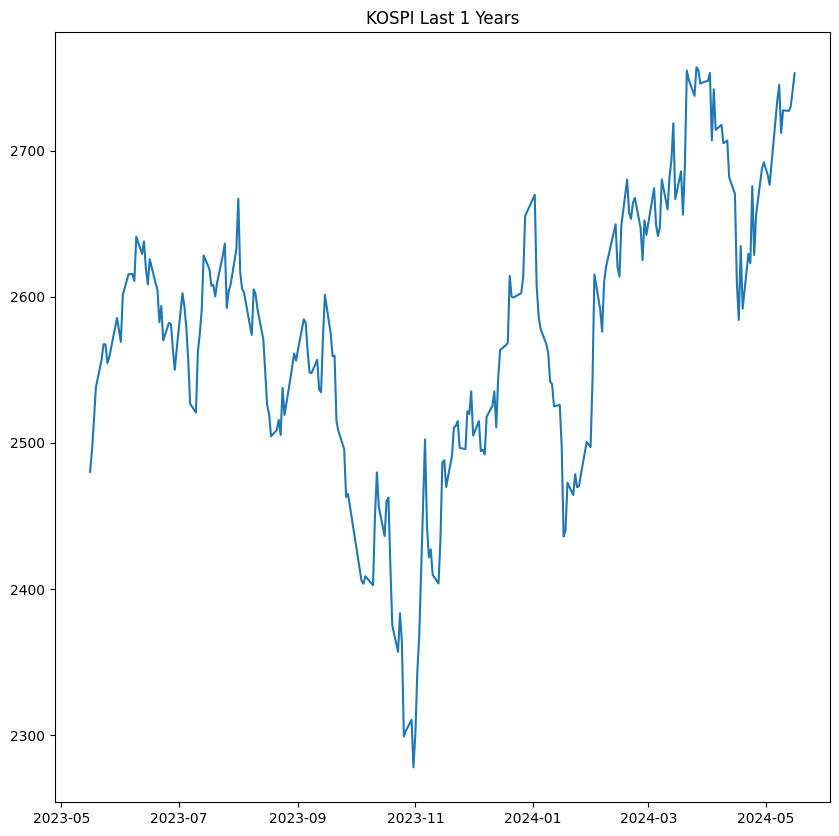

In [39]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kospi)
plt.title('KOSPI Last 1 Years')

Text(0, 0.5, 'Price')

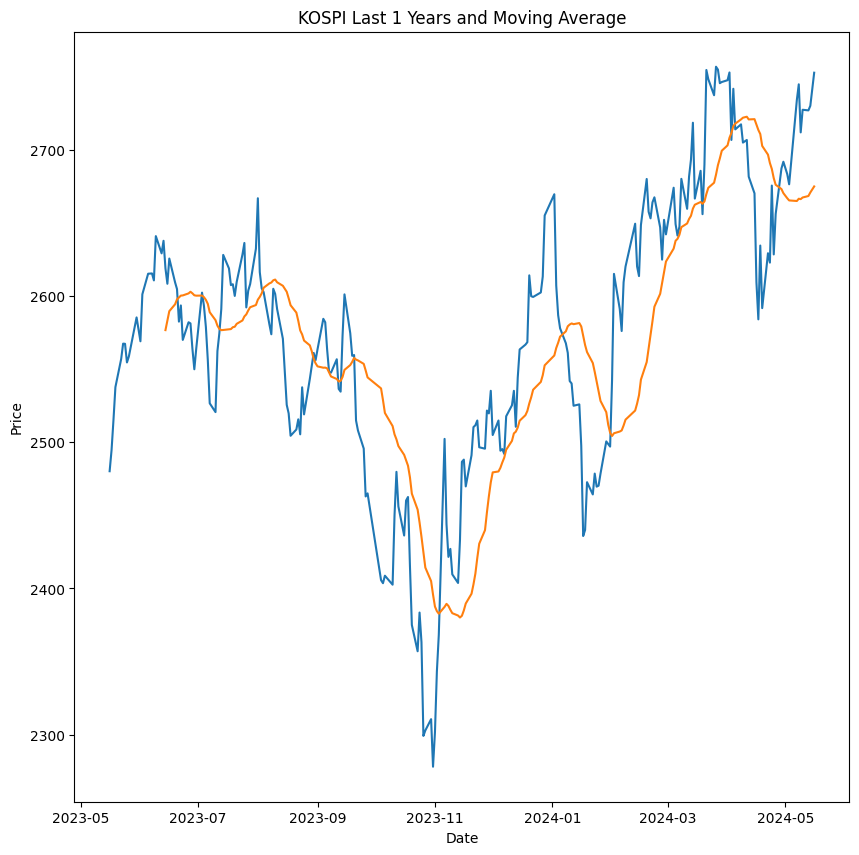

In [41]:
# 20 days moving average

df_kospi['20dMovingAverage'] = df_kospi['Close'].rolling(window = 20).mean()

plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kospi)
plt.plot('Date', '20dMovingAverage', data = df_kospi)
plt.title('KOSPI Last 1 Years and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

#### Montly time series

In [43]:
df_kospim = pd.read_csv('Data/^KS11_month.csv')
df_kospim['Date'] = pd.to_datetime(df_kospim['Date'])
df_kospim = df_kospim[df_kospim['Date'] >= '2023-05-16']
df_kospim.reset_index(drop = True, inplace = True)
df_kospim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       13 non-null     datetime64[ns]
 1   Open       13 non-null     float64       
 2   High       13 non-null     float64       
 3   Low        13 non-null     float64       
 4   Close      13 non-null     float64       
 5   Adj Close  13 non-null     float64       
 6   Volume     13 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 860.0 bytes


Text(0, 0.5, 'Price')

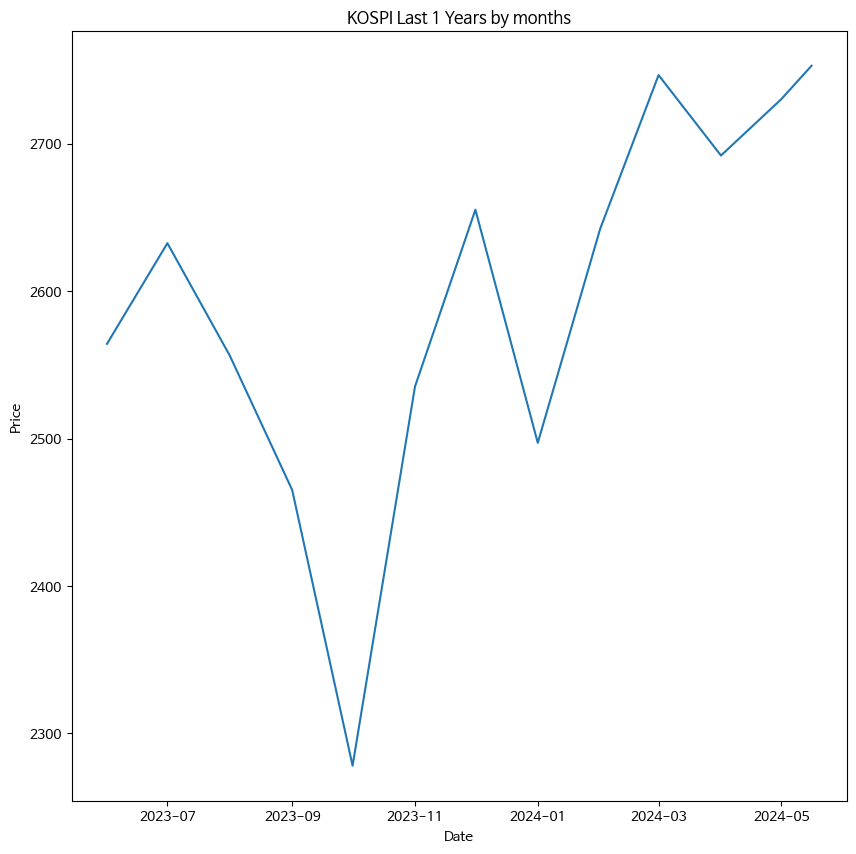

In [115]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kospim)
plt.title('KOSPI Last 1 Years by months')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

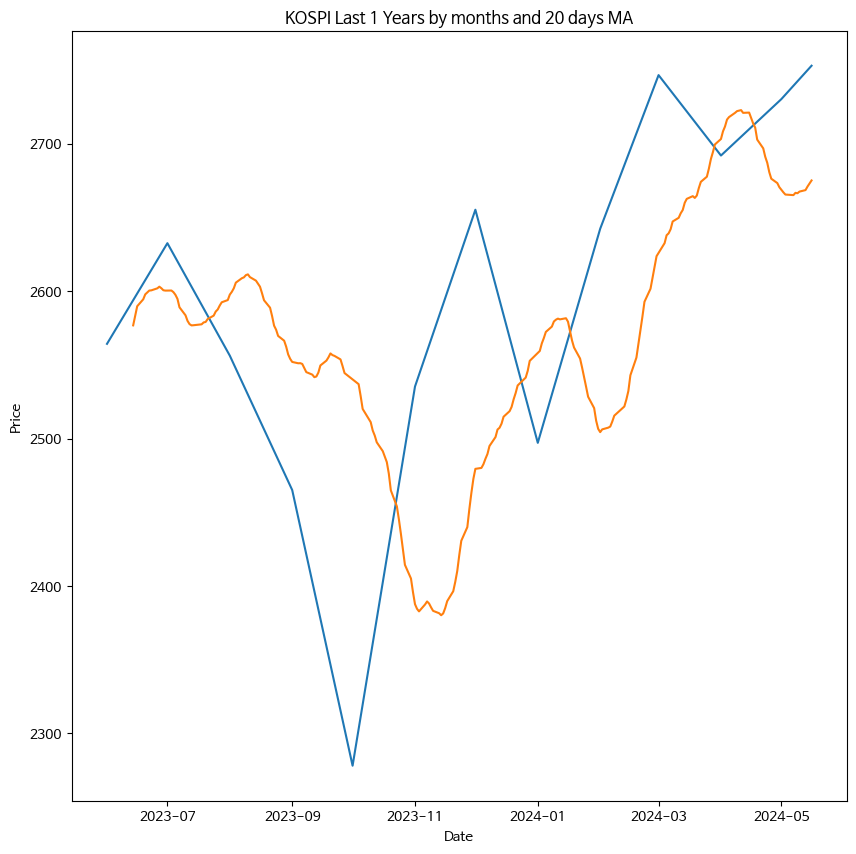

In [116]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kospim)
plt.plot('Date', '20dMovingAverage', data = df_kospi)
plt.title('KOSPI Last 1 Years by months and 20 days MA')
plt.xlabel('Date')
plt.ylabel('Price')

월별 데이터는 일별 데이터에 비해 차이가 적은 편이다. 20일 이동평균선은 (영업일을 고려하면) 30일간의 매일 종가와 유사한 전반적 흐름을 보일 것이고, 실제 비교해 보면 두 그래프는 유사한 형태를 보인다.

### Kosdaq data for the last 3 years

#### Daily

In [103]:
df_kosdaq = pd.read_csv('Data/^KQ11.csv')
df_kosdaq.info()

df_kosdaq['Date'] = pd.to_datetime(df_kosdaq['Date'])
df_kosdaq.info()

df_kosdaq = df_kosdaq[df_kosdaq['Date'] >= '2023-05-16']
df_kosdaq.reset_index(drop = True, inplace = True)
df_kosdaq

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       737 non-null    object 
 1   Open       736 non-null    float64
 2   High       736 non-null    float64
 3   Low        736 non-null    float64
 4   Close      736 non-null    float64
 5   Adj Close  736 non-null    float64
 6   Volume     736 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       737 non-null    datetime64[ns]
 1   Open       736 non-null    float64       
 2   High       736 non-null    float64       
 3   Low        736 non-null    float64       
 4   Close      736 non-null    float64       
 5   Adj Close  736 non-null    float64       
 6 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-16,818.960022,822.640015,813.320007,816.750000,816.750000,1400.0
1,2023-05-17,815.580017,834.200012,814.650024,834.190002,834.190002,1300.0
2,2023-05-18,839.270020,841.099976,833.729980,835.890015,835.890015,1300.0
3,2023-05-19,839.559998,842.210022,836.679993,841.719971,841.719971,1300.0
4,2023-05-22,840.969971,852.330017,837.489990,852.039978,852.039978,1100.0
...,...,...,...,...,...,...,...
240,2024-05-09,871.169983,873.530029,869.000000,870.150024,870.150024,1000.0
241,2024-05-10,873.559998,875.210022,864.030029,864.159973,864.159973,1000.0
242,2024-05-13,866.669983,867.080017,852.750000,854.429993,854.429993,900.0
243,2024-05-14,857.440002,865.429993,856.880005,862.150024,862.150024,1000.0


데이터를 보면, yahoo finance에서는 최근 거래일의 거래 정보가 종가만 제공되고 거래량 등은 제공되지 않는다. 따라서 해당 분석에서는 종가만을 사용하였다.

Text(0, 0.5, 'Price')

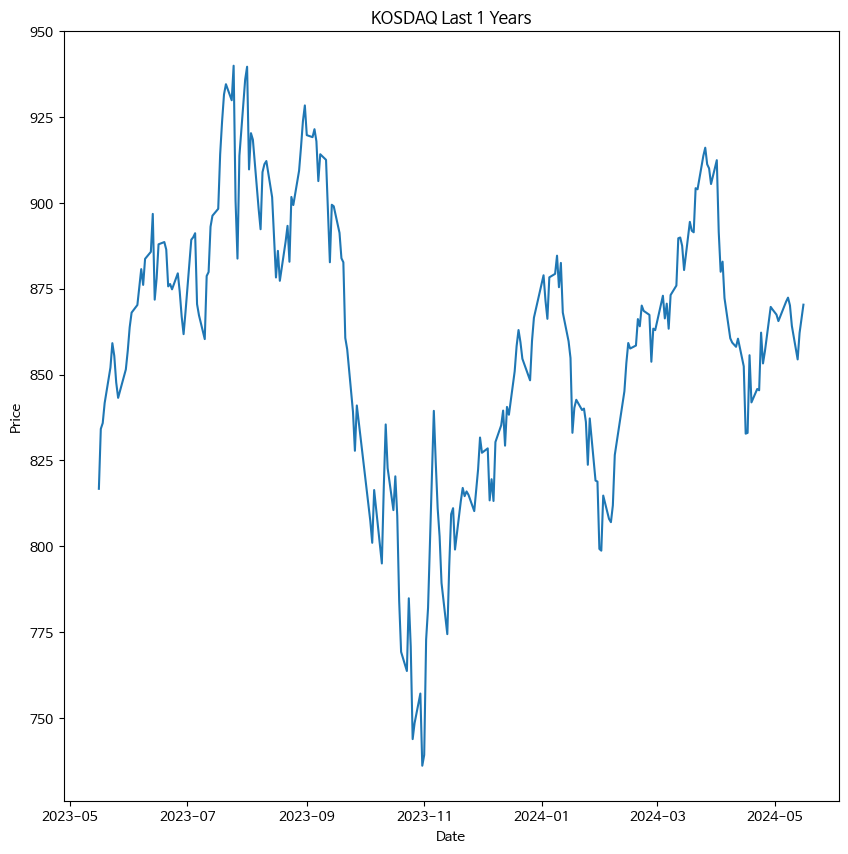

In [114]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kosdaq)
plt.title('KOSDAQ Last 1 Years')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

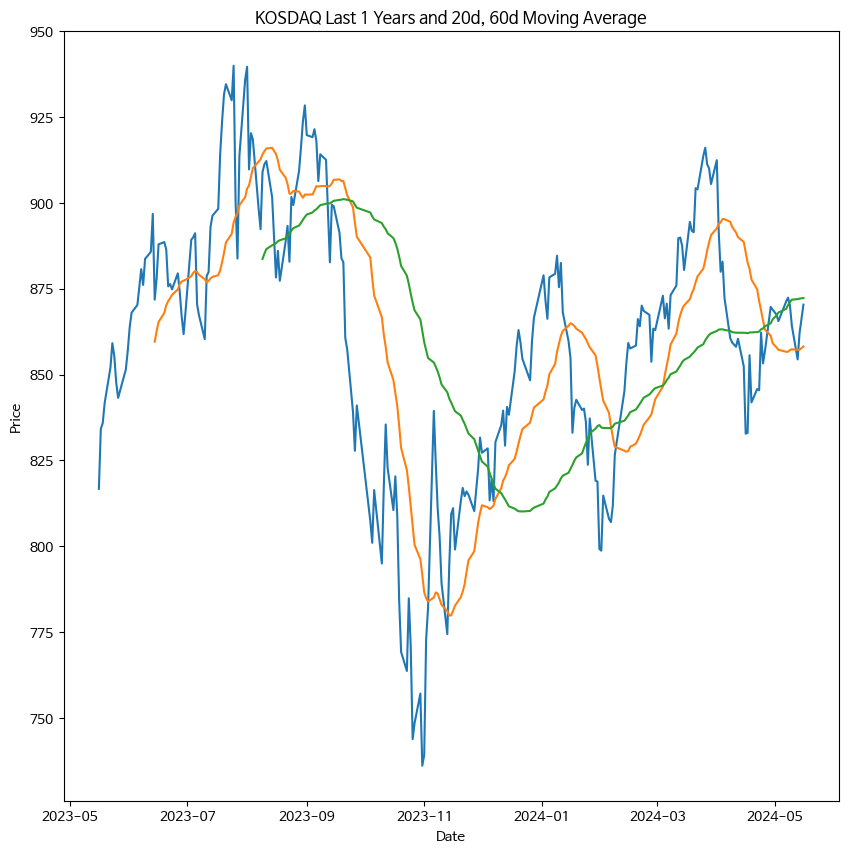

In [106]:
# 60 days moving average

df_kosdaq['20dMovingAverage'] = df_kosdaq['Close'].rolling(window = 20).mean()
df_kosdaq['60dMovingAverage'] = df_kosdaq['Close'].rolling(window = 60).mean()

plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kosdaq)
plt.plot('Date', '20dMovingAverage', data = df_kosdaq)
plt.plot('Date', '60dMovingAverage', data = df_kosdaq)
plt.title('KOSDAQ Last 1 Years and 20d, 60d Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

코스피에서 확인했던 것처럼, 20일 이동평균선은 상대적으로 평탄화되고 60일 이동평균선은 이에 비해서도 더 평탄화되는 특징이 있다.

#### Monthly

In [107]:
df_kosdaqm = pd.read_csv('Data/^KQ11_month.csv')
df_kosdaqm.info()

df_kosdaqm['Date'] = pd.to_datetime(df_kosdaqm['Date'])
df_kosdaqm.info()

df_kosdaqm = df_kosdaqm[df_kosdaqm['Date'] >= '2023-05-16']
df_kosdaqm.reset_index(drop = True, inplace = True)
df_kosdaqm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       37 non-null     object 
 1   Open       37 non-null     float64
 2   High       37 non-null     float64
 3   Low        37 non-null     float64
 4   Close      37 non-null     float64
 5   Adj Close  37 non-null     float64
 6   Volume     37 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       37 non-null     datetime64[ns]
 1   Open       37 non-null     float64       
 2   High       37 non-null     float64       
 3   Low        37 non-null     float64       
 4   Close      37 non-null     float64       
 5   Adj Close  37 non-null     float64      

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-01,855.950012,899.849976,853.679993,868.239990,868.239990,1145200
1,2023-07-01,873.909973,956.400024,857.349976,935.969971,935.969971,1154000
2,2023-08-01,944.710022,952.119995,863.320007,928.400024,928.400024,25900
3,2023-09-01,926.369995,928.000000,821.710022,841.020020,841.020020,925700
4,2023-10-01,832.299988,835.789978,734.200012,736.099976,736.099976,17000
5,2023-11-01,742.979980,847.369995,737.520020,831.679993,831.679993,18600
6,2023-12-01,826.299988,867.330017,810.520020,866.570007,866.570007,821200
7,2024-01-01,866.080017,890.059998,799.239990,799.239990,799.239990,1162800
8,2024-02-01,796.260010,875.580017,786.280029,862.960022,862.960022,1241200
9,2024-03-01,869.359985,922.570007,859.710022,905.500000,905.500000,21900


Text(0, 0.5, 'Price')

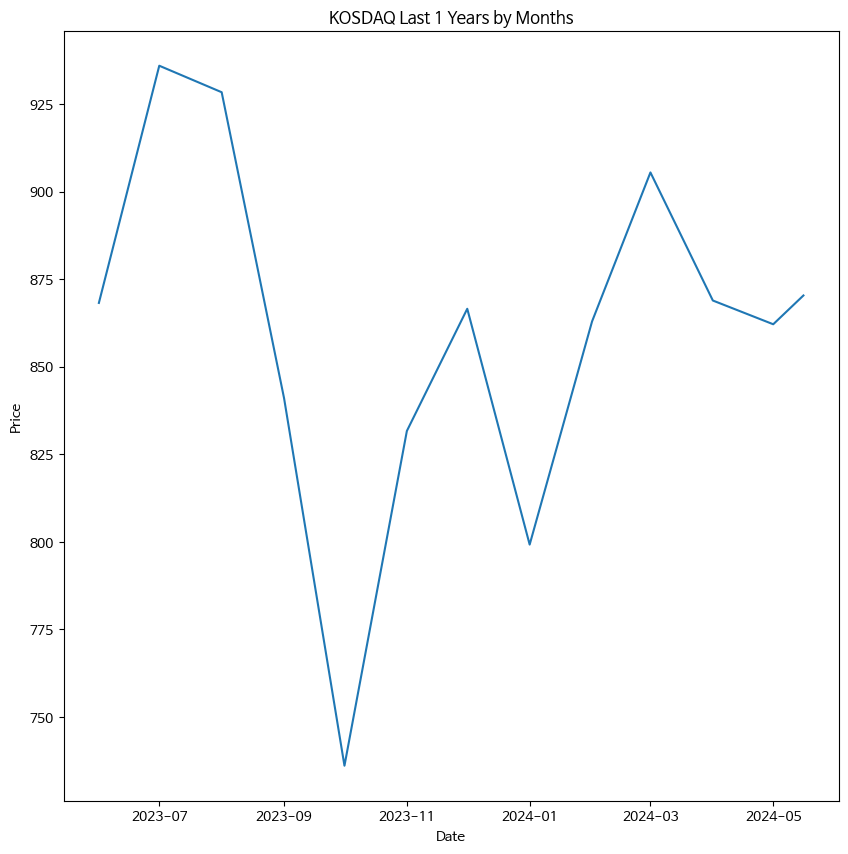

In [112]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kosdaqm)
plt.title('KOSDAQ Last 1 Years by Months')
plt.xlabel('Date')
plt.ylabel('Price')

이것만으로는 '6개월 전 떨어졌고 다시 올랐다' 이상의 정보를 파악하기가 쉽지 않다.

Text(0, 0.5, 'Price')

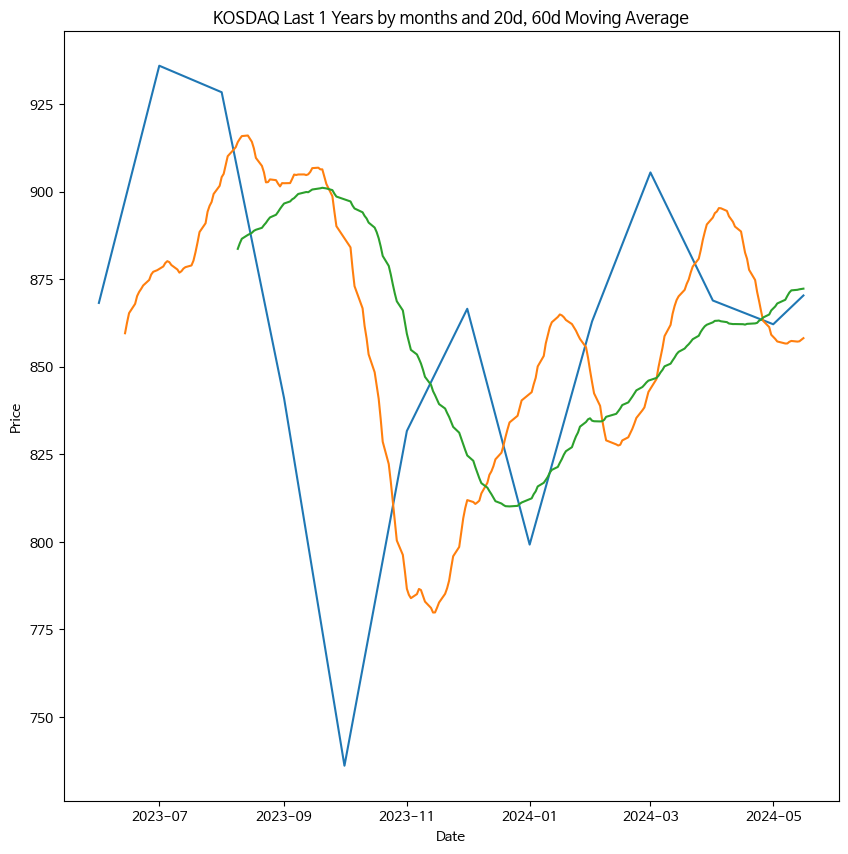

In [113]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_kosdaqm)
plt.title('KOSDAQ Last 1 Years by Months')
plt.plot('Date', '20dMovingAverage', data = df_kosdaq)
plt.plot('Date', '60dMovingAverage', data = df_kosdaq)
plt.title('KOSDAQ Last 1 Years by months and 20d, 60d Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

이렇게 올려 두면, 60d MA에서 마루가 하나 사라졌다는 확실한 특징을 파악할 수 있다.

### One company from the KOSPI market : SK hynix Inc. (000660.KS)

Downloaded stock data from yahoo finance :

https://finance.yahoo.com/quote/000660.KS/history

In [49]:
df_hy = pd.read_csv('Data/000660.KS.csv')
df_hy['Date'] = pd.to_datetime(df_hy['Date'])
df_hy = df_hy[df_hy['Date'] >= '2023-05-16']
df_hy.reset_index(drop = True, inplace = True)
df_hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       245 non-null    datetime64[ns]
 1   Open       245 non-null    float64       
 2   High       245 non-null    float64       
 3   Low        245 non-null    float64       
 4   Close      245 non-null    float64       
 5   Adj Close  245 non-null    float64       
 6   Volume     245 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.5 KB


Text(0, 0.5, 'Price')

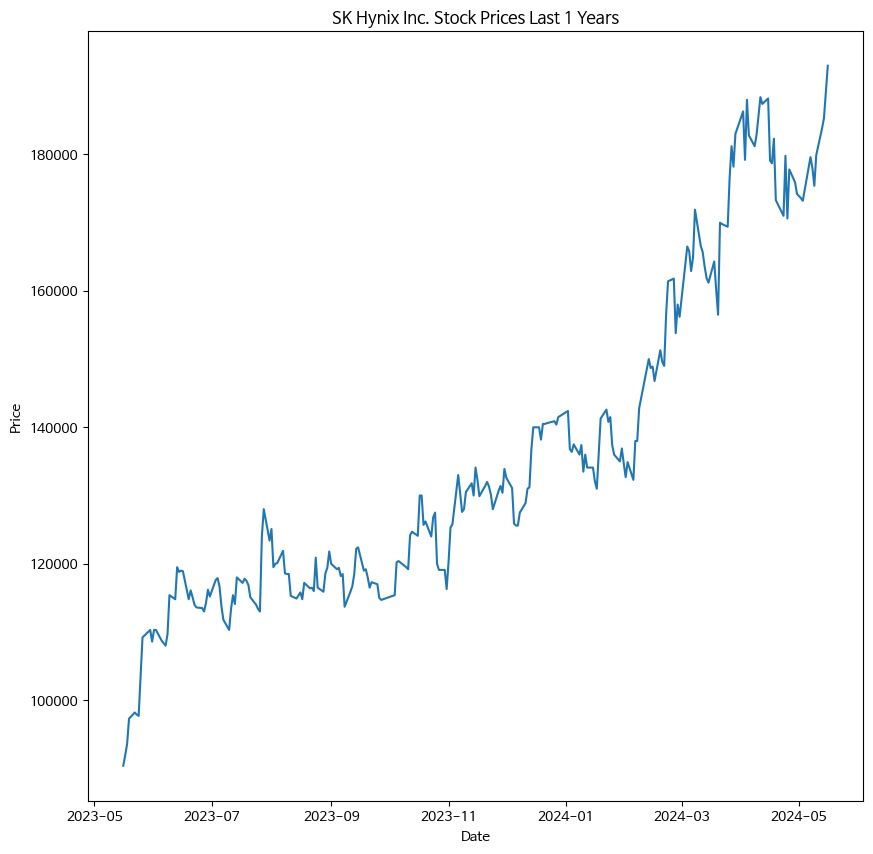

In [117]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_hy)
plt.title('SK Hynix Inc. Stock Prices Last 1 Years')
plt.xlabel('Date')
plt.ylabel('Price')

1년간 우상향을 보여 준 주식임에도 일별 종가로 보면 부침이 있는 것처럼 보인다.

Text(0, 0.5, 'Price')

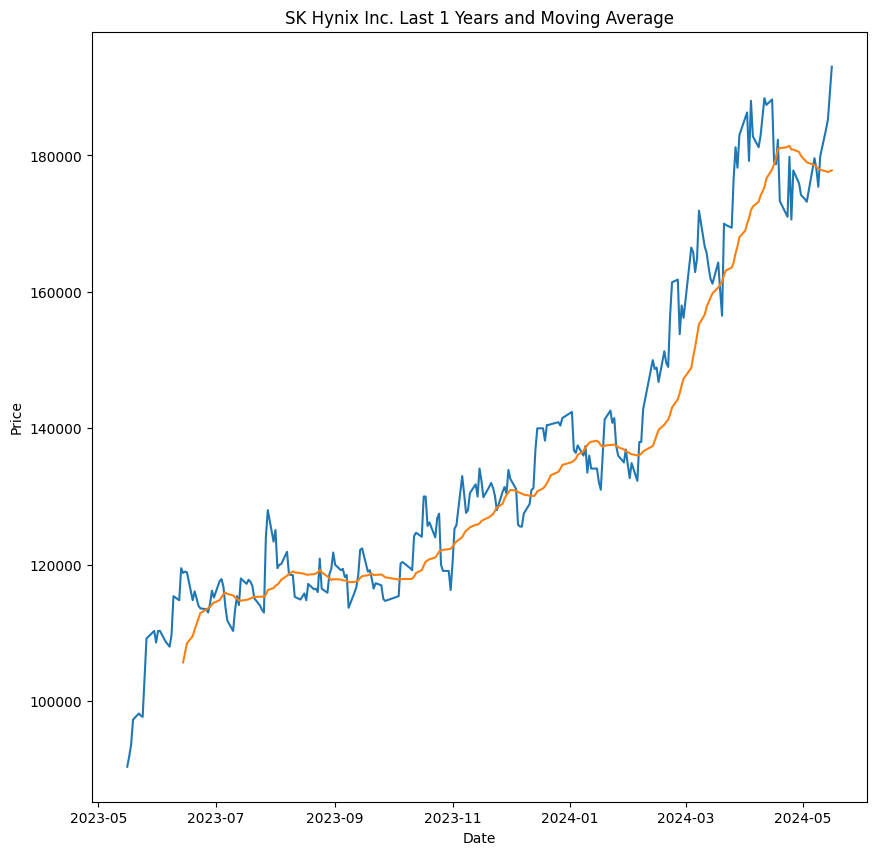

In [55]:
# 20 days moving average

df_hy['20dMovingAverage'] = df_hy['Close'].rolling(window = 20).mean()

plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_hy)
plt.plot('Date', '20dMovingAverage', data = df_hy)
plt.title('SK Hynix Inc. Last 1 Years and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

매매전략을 세워 보는 시도를 할 수도 있어 보인다. 20일선 아래로 내려갈 때마다 매일 1주씩 산다든가....

#### months

In [51]:
df_hym = pd.read_csv('Data/000660.KS_month.csv')
df_hym['Date'] = pd.to_datetime(df_hym['Date'])
df_hym = df_hym[df_hym['Date'] >= '2023-05-16']
df_hym.reset_index(drop = True, inplace = True)
df_hym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       13 non-null     datetime64[ns]
 1   Open       13 non-null     float64       
 2   High       13 non-null     float64       
 3   Low        13 non-null     float64       
 4   Close      13 non-null     float64       
 5   Adj Close  13 non-null     float64       
 6   Volume     13 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 860.0 bytes


Text(0, 0.5, 'Price')

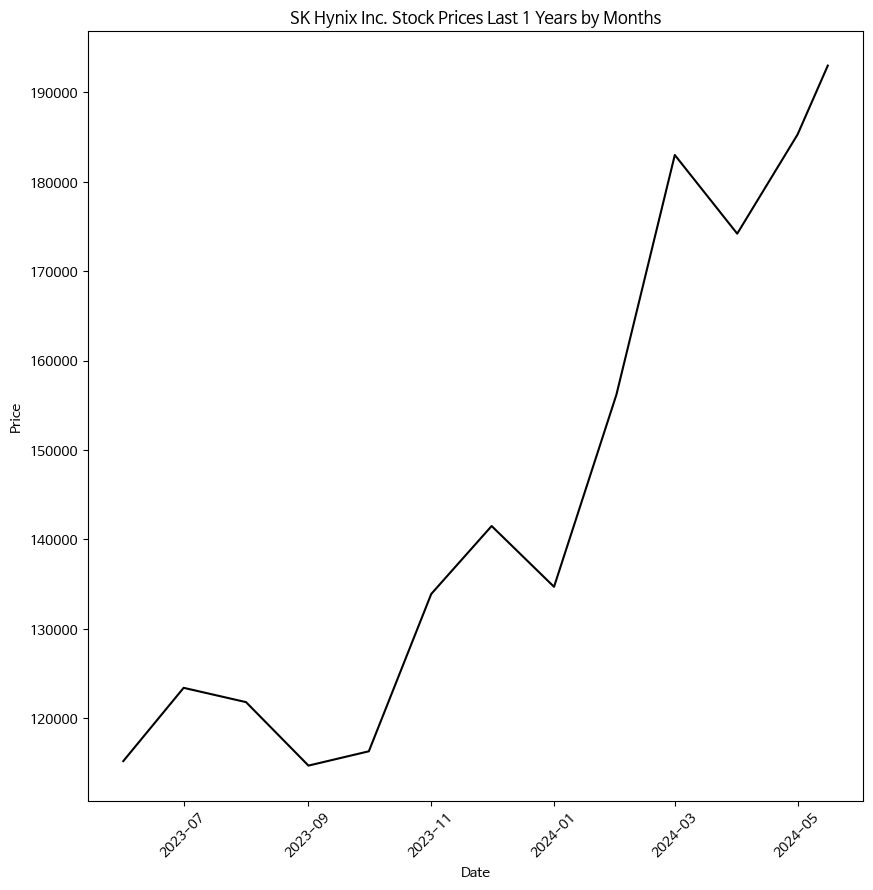

In [118]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_hym, color = 'black')
plt.xticks(rotation = 45)
plt.title('SK Hynix Inc. Stock Prices Last 1 Years by Months')
plt.xlabel('Date')
plt.ylabel('Price')

### One company from the KOSDAQ market : Ahnlab, Inc. (053800.KQ)

In [66]:
import pykrx
from pykrx import stock

해당 패키지는 python 환경에서 주가 데이터 스크래이핑을 하는 과정을 자동화한 함수들을 포함한다.

https://github.com/sharebook-kr/pykrx

해당 패키지를 사용하지 않는 경우에도, 야후 finance에서 csv를 다운로드받아 활용하는 등 다양한 방법을 사용하여 데이터를 다운로드할 수 있다.

#### Daily

In [92]:
df_ahn = stock.get_market_ohlcv("20210516", "20240516", "053800")
df_ahn

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-05-17,66300,67100,65700,65700,54703,-0.755287
2021-05-18,65200,66600,65200,66600,40660,1.369863
2021-05-20,66400,67800,66200,67400,78148,1.201201
2021-05-21,67400,68200,67200,67300,81926,-0.148368
2021-05-24,67200,67500,66500,67300,40925,0.000000
...,...,...,...,...,...,...
2024-05-09,64700,65400,64500,64500,28466,-0.769231
2024-05-10,64500,66500,64500,66500,97293,3.100775
2024-05-13,66500,66600,65000,65000,57714,-2.255639


In [93]:
df_ahn.rename(columns = {'날짜':'Date', '종가':'Close', '거래량':'Volume'}, inplace = True)
df_ahn.index.names = ['Date']
df_ahn

,시가,고가,저가,Close,Volume,등락률
Date,,,,,,
2021-05-17,66300,67100,65700,65700,54703,-0.755287
2021-05-18,65200,66600,65200,66600,40660,1.369863
2021-05-20,66400,67800,66200,67400,78148,1.201201
2021-05-21,67400,68200,67200,67300,81926,-0.148368
2021-05-24,67200,67500,66500,67300,40925,0.000000
...,...,...,...,...,...,...
2024-05-09,64700,65400,64500,64500,28466,-0.769231
2024-05-10,64500,66500,64500,66500,97293,3.100775
2024-05-13,66500,66600,65000,65000,57714,-2.255639


In [97]:
df_ahn.rename(columns = {'날짜':'Date', '종가':'Close', '거래량':'Volume'}, inplace = True)
df_ahn = df_ahn.loc[df_ahn.index >= '2023-05-16']
df_ahn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-05-16 to 2024-05-16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      245 non-null    int32  
 1   고가      245 non-null    int32  
 2   저가      245 non-null    int32  
 3   Close   245 non-null    int32  
 4   Volume  245 non-null    int32  
 5   등락률     245 non-null    float64
dtypes: float64(1), int32(5)
memory usage: 8.6 KB


,시가,고가,저가,Close,Volume,등락률
Date,,,,,,
2023-05-16,62300,63000,60900,61000,206093,-2.086677
2023-05-17,61000,61900,60700,61500,68596,0.819672
2023-05-18,61700,62200,61600,62000,42129,0.813008
2023-05-19,62200,62700,61800,62100,97875,0.161290
2023-05-22,62300,62900,61900,62500,73190,0.644122
...,...,...,...,...,...,...
2024-05-09,64700,65400,64500,64500,28466,-0.769231
2024-05-10,64500,66500,64500,66500,97293,3.100775
2024-05-13,66500,66600,65000,65000,57714,-2.255639


Text(0, 0.5, 'Price')

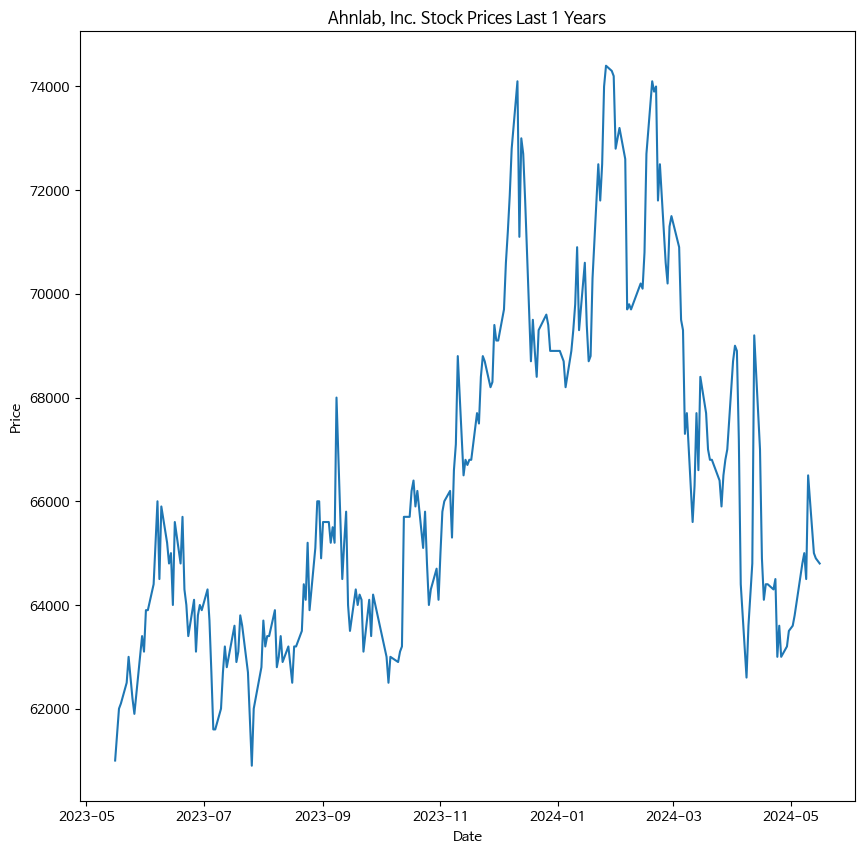

In [119]:
plt.figure(figsize = (10, 10))
plt.plot('Close', data = df_ahn)
plt.title('Ahnlab, Inc. Stock Prices Last 1 Years')
plt.xlabel('Date')
plt.ylabel('Price')

#### months

https://finance.yahoo.com/quote/053800.KQ/history

에서 월별 데이터를 다운로드하였다.

In [101]:
df_ahnm = pd.read_csv('Data/053800.KQ_month.csv')
df_ahnm['Date'] = pd.to_datetime(df_ahnm['Date'])
df_ahnm = df_ahnm[df_ahnm['Date'] >= '2023-05-16']
df_ahnm.reset_index(drop = True, inplace = True)
df_ahnm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   Open       243 non-null    float64       
 2   High       243 non-null    float64       
 3   Low        243 non-null    float64       
 4   Close      243 non-null    float64       
 5   Adj Close  243 non-null    float64       
 6   Volume     243 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.5 KB


Text(0, 0.5, 'Price')

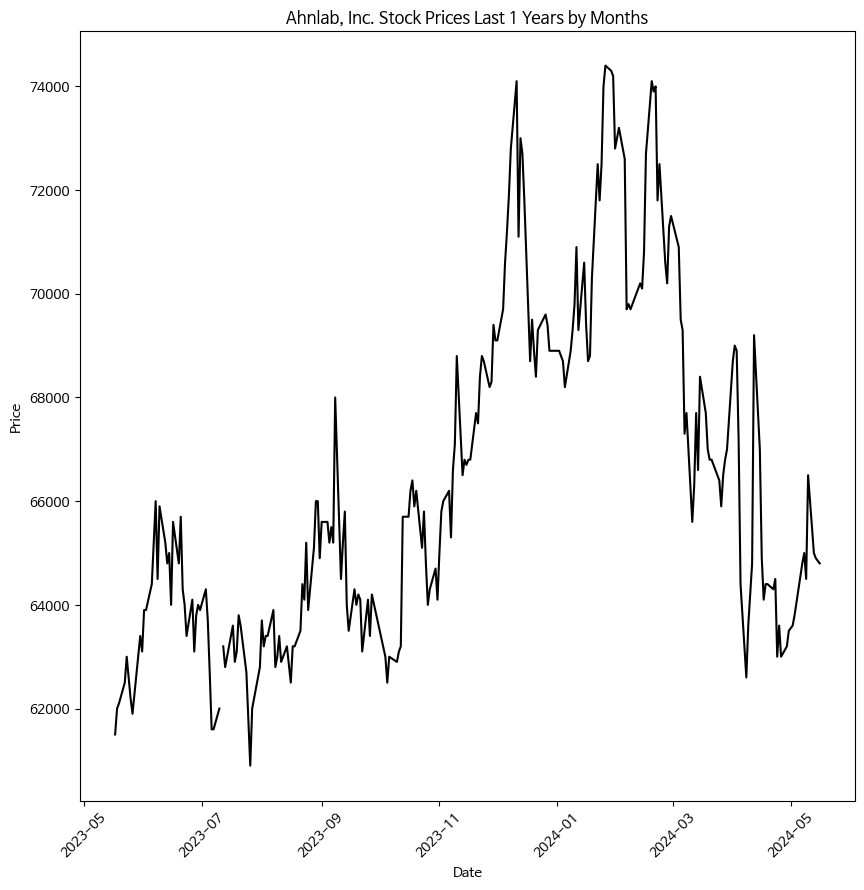

In [120]:
plt.figure(figsize = (10, 10))
plt.plot('Date', 'Close', data = df_ahnm, color = 'black')
plt.xticks(rotation = 45)
plt.title('Ahnlab, Inc. Stock Prices Last 1 Years by Months')
plt.xlabel('Date')
plt.ylabel('Price')